# Analysis - SGD Batch Size

## Packages and Data Set

### Import Packages

In [1]:
# package imports for numeric computing
import numpy as np
import random as rnd
# Inputting latex
from IPython.display import display, Math, Latex
# package import for graphing
import matplotlib.pyplot as plt
%matplotlib inline

### Generating Data

In [2]:
# Generating sample training data
# Function: sin(2pi*x) + rand()
# rand used to add noise to the training data and norm. dist.
trainVals = 1000
X = [rnd.random() for r in xrange(trainVals)]
Y = [np.sin(2*np.pi*x) + (2)*np.random.normal(0,0.6) for x in X]
trainData = np.column_stack((X,Y))
print("The function we will be predicting")
display(Math(r'y_i = sin(2\pi x_i) + \frac{3}{2}rand()'))
print("Where rand() is used to add noise to the data.") 

The function we will be predicting


<IPython.core.display.Math object>

Where rand() is used to add noise to the data.


### Graphing the training data

### The Effect of Noise to a Dataset

## Defining Functions

### Regression Function

In [3]:
def y(x,weights):
    yVector = [weights[i]*x**i for i in range(0,len(weights))]
    return sum(yVector)
print("The polynomial regression function we're using is defined:")
display(Math(r'f(x,w) = \sum_{i=0}^{n}w_{i}x^i'))

The polynomial regression function we're using is defined:


<IPython.core.display.Math object>

### Loss Functions

In [4]:
# Basic cost funct.
# divided through by training data length the normalize
def loss(w,trainData):
    cost = 0
    for i in range(0,len(trainData)):
        cost += (y(trainData[i][0],w) - trainData[i][1])**2 
    return cost/(2*len(trainData))

# Cost funct. with weight decay
# remember to add ld to main funct. when using
def lossWD(w, trainData,ld):
    cost = 0
    for i in range(0,len(trainData)):
        cost += (y(trainData[i][0],w) - trainData[i][1])**2 + (ld/2)*abs(sum(w))**2
    return cost/(2*len(trainData))

print( "The two loss functions we will look at are:")
display(Math(r'loss(x) = \frac{1}{2m}\bigg(\sum_{i=1}^{m}\big(f(x_i,W) - y_i\big)^2\bigg)'))
display(Math(r'lossWD(x) = \frac{1}{2m}\bigg(\sum_{i=1}^{m}\big(f(x_i,W) - y_i\big)^2\bigg) + \frac{\lambda}{2}||W||^2'))
print(" lossWD(x) includes a weight decay function used for regularisation of the model")

The two loss functions we will look at are:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

 lossWD(x) includes a weight decay function used for regularisation of the model


### Gradient Descent Function

In [5]:
# normalize

def gradDescent(weighting,trainData,learnRate,ld):
    wGrad = np.zeros(len(weighting))
    N = len(trainData)
    for point in range(0, N):   
        for i in range(0, len(weighting)):
            wGrad[i] += trainData[point][0]**i*(y(trainData[point][0],weighting) \
            - trainData[point][1]) - ld*abs(weighting[i])
    w_ = [origW - learnRate*(float(1)/float(N))*wIter for origW, wIter \
          in zip(weighting, wGrad)]
    return w_

print( "The gradient descent algorithm for this polynomial learner is:")
display(Math(r'w_i = w_i-\frac{\alpha}{n}\sum_{j=1}^{n}\big(f(x_j,W)-y_j\big)x_j^i'))

The gradient descent algorithm for this polynomial learner is:


<IPython.core.display.Math object>

## Training Process

### Optimisation Function

In [6]:
# Iteration Function
# optimise_() returns an array of the weights and error at n/4, n/2, 3n/4, n iterations."
def optimise_(weighting, trainData, learnRate, ld, maxIter, minTOL):
    n = 0
    TOL = 10e10
    optList = [] # Probably should change var name
    # look in bishops book, Tychonov regularization, ld = 1.0 e-18
    h = []
    while n < maxIter and  TOL > minTOL:
        weighting = gradDescent(weighting, trainData, learnRate,ld)
        TOL = loss(weighting, trainData)
        n += 1
        if n%(int(round(maxIter/5))) == 0:
            optList += [[n, TOL, weighting]]
            print("The TOL at n = " + str(n) +" is " + str(round(TOL,6))) 
        h += [[n, TOL]]
    return optList, h
print("optimise_() is a iterative function using gradient descent to find the optimal" \
     + " values for the weighting vector.")

optimise_() is a iterative function using gradient descent to find the optimal values for the weighting vector.


In [7]:
def optimiseSGD(weighting, trainData, learnRate, ld, batchSize, maxIter,minTOL):
    iteration = 0; TOL = 10e10; n = 10e10
    optList = []; optCond = [10e10, None,None]
    h = []
    while iteration < maxIter and TOL > minTOL:
        if (n + batchSize - len(trainData)) > 0:
            trainDataIndex = range(len(trainData))
            rnd.shuffle(trainDataIndex)
            trainData = [trainData[i] for i in trainDataIndex]
            n = 0    
        weighting = gradDescent(weighting, trainData[n:n+batchSize], learnRate,ld)
        TOL = loss(weighting, trainData)
        iteration += 1; n += batchSize
        if iteration%(int(round(maxIter/5))) == 0:
            optList += [[iteration, TOL, weighting]]
            print("The TOL at iteration " + str(iteration) +" is " + str(round(TOL,6)))
        if TOL < optCond[0]:
            optCond = [TOL, iteration, weighting]
        h += [[iteration, TOL]]
    optList += [optCond]
    print("Optimal optimisation at n = "+str(optList[-1][1])+" of TOL: "\
          +str(optList[-1][0]))
    return optList, h
print("optimise_() is a iterative function using SGD to find the optimal" \
     + " values for the weighting vector.")

optimise_() is a iterative function using SGD to find the optimal values for the weighting vector.


## Learner Results

### Perform Optimisation

In [8]:
# to measure time
import time

In [9]:
def optAnalysis(underlyingFunct, trainSetSize, randParam, learnRate, maxIter):
    X = [rnd.random() for r in xrange(trainSetSize)]
    Y = [underlyingFunct(x) + randParam[0]*np.random.normal(0,randParam[1]) \
         for x in X]
    trainData = np.column_stack((X,Y))
    print("Training Data Plot")
    plt.plot(X,Y,"o")
    plt.xlabel("x Vals"); plt.ylabel("y Vals")
    plt.show()
    cond = raw_input("happy with the underlying function? ")
    if cond == "yes" or cond == "Yes":
        initWeights = [2*rnd.random()-1 for _ in range(10)]
        SGDList = [[5,'r',"red"],[10,'b',"blue"],[50,'c',"cyan"],[100,'k',"black"]]
        #SGDList = [[50,'c',"cyan"],[100,'k',"black"]]
        print("___Batch Gradient Descent___")
        print("Plot colour: green")
        startTime = time.time()
        optBatchList, batchVals = optimise_(initWeights, trainData, learnRate,\
                                            1e-5, maxIter, 10e-5)
        nVals = [batchVals[i][0] for i in range(len(batchVals))]
        TOLVals = [batchVals[i][1] for i in range(len(batchVals))]
        plt.plot(nVals, TOLVals, 'g')
        print("%s seconds to train" % (round(time.time() - startTime,4)))
        for i in range(len(SGDList)):
            print("")
            print("___SGB with batch size "+str(SGDList[i][0])+"___")
            print("Plot colour: "+SGDList[i][2])
            startTime = time.time()
            optSGDList, SGDVals = optimiseSGD(initWeights, trainData, learnRate, \
                                            1e-5, SGDList[i][0],3*maxIter, 10e-5)
            print("%s seconds to train" % (round(time.time() - startTime,4)))
            nVals = [SGDVals[j][0] for j in range(len(SGDVals))]
            TOLVals = [SGDVals[j][1] for j in range(len(SGDVals))]
            plt.plot(nVals, TOLVals,SGDList[i][1])
        plt.xlabel("Iterations")
        plt.ylabel("TOL")
        plt.show()

Training Data Plot


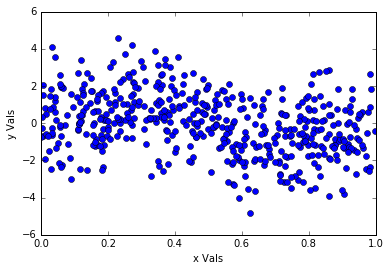

happy with the underlying function? yes
___Batch Gradient Descent___
Plot colour: green
The TOL at n = 20 is 1.155635
The TOL at n = 40 is 1.140035
The TOL at n = 60 is 1.134571
The TOL at n = 80 is 1.131947
The TOL at n = 100 is 1.130181
4.9472 seconds to train

___SGB with batch size 5___
Plot colour: red
The TOL at iteration 60 is 5.852624
The TOL at iteration 120 is 2.01387
The TOL at iteration 180 is 1.29478
The TOL at iteration 240 is 1.239693
The TOL at iteration 300 is 7.08889
Optimal optimisation at n = 255 of TOL: 1.12302649147
1.2158 seconds to train

___SGB with batch size 10___
Plot colour: blue
The TOL at iteration 60 is 1.615588
The TOL at iteration 120 is 1.417708
The TOL at iteration 180 is 2.046711
The TOL at iteration 240 is 1.245191
The TOL at iteration 300 is 1.132009
Optimal optimisation at n = 194 of TOL: 1.12575042879
1.422 seconds to train

___SGB with batch size 50___
Plot colour: cyan
The TOL at iteration 60 is 1.269317
The TOL at iteration 120 is 1.129839
Th

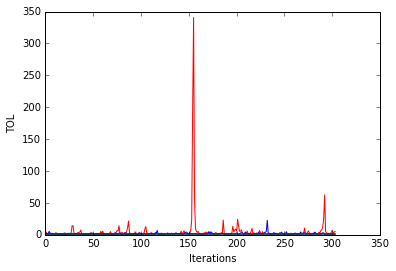

In [10]:
def f(x):
    return np.sin(2*np.pi*x)

optAnalysis(f, 500, [0.5,3],1,101)